In [1]:
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open("../Results/InitialFinalScore/dc188.csv",'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]))

plt.scatter(x,y)
plt.xlabel('jakość rozwiązania początkowego')
plt.ylabel('jakość rozwiązania końcowego')
plt.savefig('initial_final.pdf')
plt.show()

<Figure size 640x480 with 1 Axes>

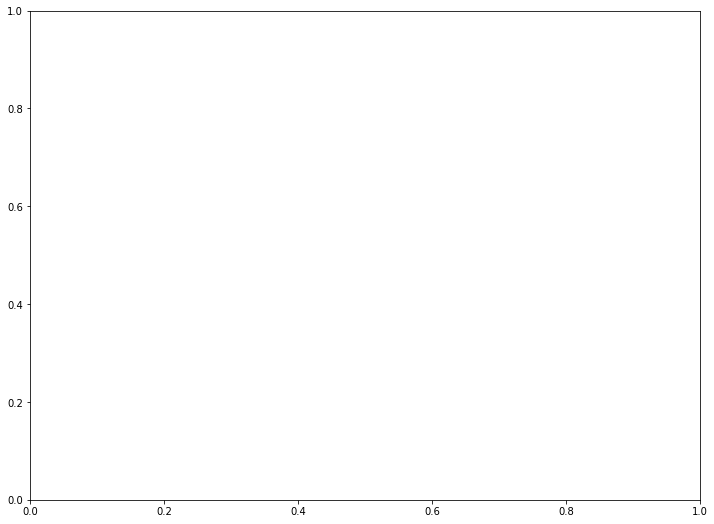

In [14]:
import os
import statistics
import re
import numpy as np

fig,  (ax0) = plt.subplots()

def sorted_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

def load_solver_measurements(solver_name):
    scores=[]
    times=[]
    seens=[]
    steps=[]
    labels = []
    prefixed = [filename for filename in os.listdir('../Results/Scores/') if filename.startswith(solver_name)]
    for filename in sorted_nicely(prefixed):
        labels.append(int(filename.split('_')[1][:-4]))
        with open("../Results/Scores/"+filename,'r') as csvfile:
            score=[]
            time=[]
            seen=[]
            step=[]
            plots = csv.reader(csvfile, delimiter=',')
            i=0;
            for row in plots:
                score.append(float(row[0]))
                time.append(float(row[1])/1000000)
                seen.append(float(row[2]))
                step.append(float(row[3]))
                i+=1
#                 if i==10:
#                     break
        scores.append(score)
        times.append(time)
        seens.append(seen)
        steps.append(step)
        
    return scores,times,labels,seens,steps



def get_mean_and_std(X):
    means=[]
    stds=[]
    for x in X:
        means.append(statistics.mean(x))
        stds.append(statistics.stdev(x))
    return means,stds

def get_effectiveness(scores):
    effectiveness = []
    best_score = 999999
    for score in scores:
        if score<best_score:
            best_score = score
        effectiveness.append(best_score)
    return effectiveness
        
            
def draw_avg_scoreplot(solver_name):
    scores,times,dimensions = load_solver_measurements(solver_name)[0:3]
    means,stds = get_mean_and_std(scores)
    a = np.arange(len(dimensions))
    plt.xticks(a,dimensions)
    plt.xlabel('instance size')
    plt.ylabel('average solution cost +- std')
    ax0.set_yscale('symlog')
    ax0.errorbar(a, means, yerr=stds, fmt='-o',label=solver_name)
   

    
def draw_best_scoreplot(solver_name):
    scores,times,dimensions = load_solver_measurements(solver_name)[0:3]
    bests = [min(x) for x in scores]
    a = np.arange(len(dimensions))
    plt.xticks(a,dimensions)
    plt.xlabel('instance size')
    plt.ylabel('best solution cost')
    ax0.set_yscale('symlog')
    ax0.plot(a,bests, marker='o',label=solver_name)
   
    
def draw_timeplot(solver_name):
    scores,times,dimensions = load_solver_measurements(solver_name)[0:3]
    means,stds = get_mean_and_std(times)
    a = np.arange(len(dimensions))
    plt.xticks(a,dimensions)
    plt.xlabel('instance size')
    plt.ylabel('average time(ms)')
    ax0.plot(a,means, marker='o',label=solver_name)
    
def draw_steps(solver_name):
    dimensions,seen,steps = load_solver_measurements(solver_name)[2:5]
    means,stds = get_mean_and_std(steps)
    a = np.arange(len(dimensions))
    plt.xticks(a,dimensions)
    plt.xlabel('rozmiar instancji')
    plt.ylabel('wykonane kroki')
    ax0.plot(a,means, marker='o',label=solver_name)
def draw_seen(solver_name):
    dimensions,seen,steps = load_solver_measurements(solver_name)[2:5]
    means,stds = get_mean_and_std(seen)
    a = np.arange(len(dimensions))
    plt.xticks(a,dimensions)
    plt.xlabel('rozmiar instancji')
    plt.ylabel('przejrzane rozwiązania')
    ax0.plot(a,means, marker='o',label=solver_name)
def draw_effectivness(solver_name,instanceNum):
    scores,times,dimensions = load_solver_measurements(solver_name)[0:3]
    scores = scores[instanceNum]
    eff = get_effectiveness(scores)
   # plt.xticks(a,dimensions)
    plt.xlabel('execution number')
    plt.ylabel('best solution')
    ax0.plot(eff,label=solver_name)

def draw_scoretime_ratio(solver_name):
    scores,times,dimensions = load_solver_measurements(solver_name)[0:3]
    means,stds = get_mean_and_std(scores)
    means2,stds2 = get_mean_and_std(times)
    ratio = [x/y for x,y in zip(means,means2)]
    a = np.arange(len(dimensions))
    plt.xticks(a,dimensions)
    plt.xlabel('rozmiar instancji')
    plt.ylabel('efektywność')
    ax0.plot(a, ratio, marker='o',label=solver_name)
def save_and_clear(filename):
    plt.rcParams['figure.figsize'] = [12, 9]
    plt.legend(loc='upper right')
    plt.savefig(filename, bbox_inches='tight',dpi=300)
    plt.cla()
    
    
    
draw_avg_scoreplot('greedy')
draw_avg_scoreplot('steepest')
draw_avg_scoreplot('heuristic')
draw_avg_scoreplot('random')
draw_avg_scoreplot('annealing')
draw_avg_scoreplot('rwalk')

save_and_clear("avg")

draw_timeplot('greedy')
draw_timeplot('steepest')
draw_timeplot('heuristic')
draw_timeplot('random')
draw_timeplot('annealing')
draw_timeplot('rwalk')

save_and_clear("time")
                
draw_best_scoreplot('greedy')
draw_best_scoreplot('steepest')
draw_best_scoreplot('heuristic')
draw_best_scoreplot('random')
draw_best_scoreplot('annealing')
draw_best_scoreplot('rwalk')

save_and_clear("best")

draw_scoretime_ratio('greedy')
draw_scoretime_ratio('steepest')
draw_scoretime_ratio('heuristic')
draw_scoretime_ratio('random')
draw_scoretime_ratio('annealing')

save_and_clear("scoretime_ratio")

draw_effectivness('greedy',4)
draw_effectivness('steepest',4)

save_and_clear("effectiveness")

# draw_effectivness('greedy',8)
# draw_effectivness('steepest',8)

# save_and_clear("effectiveness2")

draw_seen('greedy')
draw_seen('steepest')

save_and_clear("seen")

draw_steps('greedy')
draw_steps('steepest')

save_and_clear("steps")